In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_auc_score, roc_curve)

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau




In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Load & Explore Data**

In [6]:
# Read the data
train_df = pd.read_csv("/content/drive/MyDrive/Training/Higgs Boson/train.csv")

In [7]:
test_df = pd.read_csv("/content/drive/MyDrive/Training/Higgs Boson/test.csv")

In [8]:
train_df

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185287,285287,b,74.065,6.909,36.613,127.638,4.388,579.244,-4.728,1.184,...,1.782,234.292,3,100.276,-2.488,-1.028,41.043,1.90,-3.034,180.002
185288,285288,s,108.334,26.340,82.069,3.133,-999.000,-999.000,-999.000,3.123,...,-1.953,56.468,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
185289,285289,b,83.281,45.890,68.343,7.380,-999.000,-999.000,-999.000,2.376,...,-2.072,99.302,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
185290,285290,b,96.655,39.339,79.921,30.437,-999.000,-999.000,-999.000,2.296,...,-0.374,191.837,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [9]:
#test_df

In [10]:
#Understand the Columns
print(train_df.columns)
train_df.head()

Index(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')


,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [14]:
test_df.shape

(179839, 32)

In [15]:
train_df.shape

(185292, 32)

**2. Data Preparation**

In [18]:
# Separate features and labels
X = train_df.drop(['Id', 'Prediction'], axis=1)
y = train_df['Prediction']

# Convert 's' and 'b' labels to numerical (1 and 0)
y = y.map({'s': 1, 'b': 0})

# Handle -999.0 values as missing
X.replace(-999.0, np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train/val/test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

**Model Building**

In [19]:
# Define model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.5, patience=5)
]

# Train model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=256,
    callbacks=callbacks,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7235 - loss: 0.5390 - val_accuracy: 0.8258 - val_loss: 0.3953 - learning_rate: 0.0010
Epoch 2/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8140 - loss: 0.4165 - val_accuracy: 0.8313 - val_loss: 0.3804 - learning_rate: 0.0010
Epoch 3/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8207 - loss: 0.4037 - val_accuracy: 0.8330 - val_loss: 0.3761 - learning_rate: 0.0010
Epoch 4/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8230 - loss: 0.3955 - val_accuracy: 0.8342 - val_loss: 0.3717 - learning_rate: 0.0010
Epoch 5/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8266 - loss: 0.3890 - val_accuracy: 0.8363 - val_loss: 0.3694 - learning_rate: 0.0010
Epoch 6/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8294 - loss: 0.3858 - val_accuracy: 0.8368 - val_loss: 0.3676 - learning_rate: 0.0010
Epoch 7/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8289 - loss: 0.

**3. Model Evaluation**

**Training Curves**

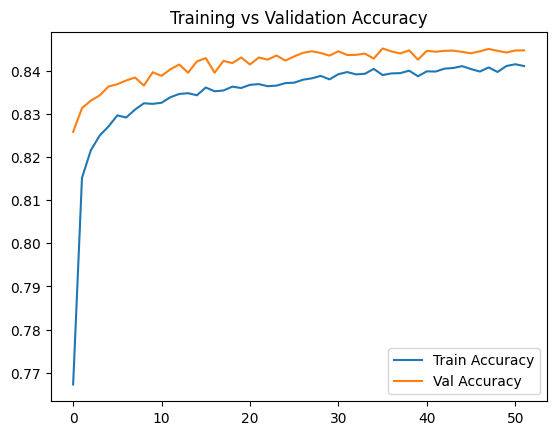

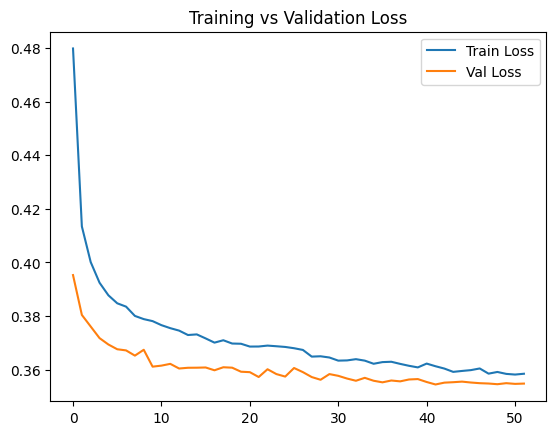

In [20]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()


**Metrics on Test Set**

869/869 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8426638842915737
Precision: 0.7960379791349197
Recall: 0.720606960950764
F1 Score: 0.7564466722361459
ROC AUC: 0.9091221101938737


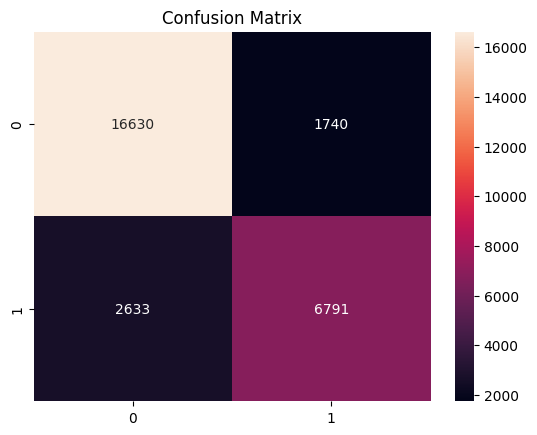

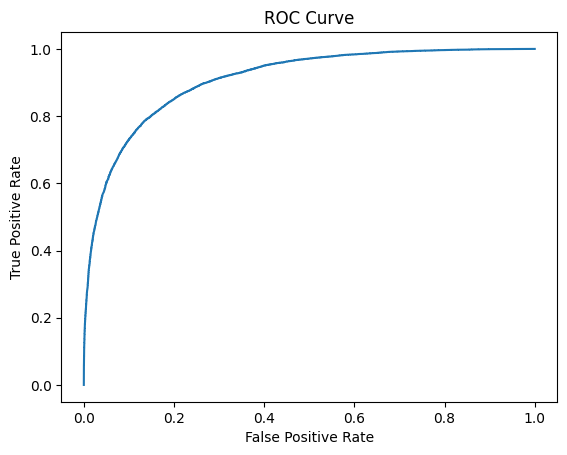

In [21]:
# Predictions
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()


***Tree-Based Baseline (XGBoost)***

In [22]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_prob = xgb_model.predict_proba(X_test)[:, 1]

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("XGBoost F1 Score:", f1_score(y_test, xgb_pred))
print("XGBoost ROC AUC:", roc_auc_score(y_test, xgb_prob))


XGBoost Accuracy: 0.8380225948046341
XGBoost F1 Score: 0.7518465439312093
XGBoost ROC AUC: 0.9057018131124692


In [23]:
#Predict on External Test Set
# Prepare 5k test set
X_5k = test_df.drop(['Id', 'Prediction'], axis=1)
X_5k.replace(-999.0, np.nan, inplace=True)
X_5k.fillna(X_5k.mean(), inplace=True)
X_5k_scaled = scaler.transform(X_5k)

# Predict
y_5k_pred = (model.predict(X_5k_scaled).flatten() > 0.5).astype(int)

# Save output
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'Prediction': y_5k_pred
})
submission.to_csv("higgs_5k_predictions.csv", index=False)

5620/5620 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


**Tuning Function**

In [24]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=256,
    callbacks=callbacks
)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


507/507 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7293 - loss: 0.5486 - val_accuracy: 0.8217 - val_loss: 0.3977 - learning_rate: 0.0010
Epoch 2/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8082 - loss: 0.4240 - val_accuracy: 0.8306 - val_loss: 0.3825 - learning_rate: 0.0010
Epoch 3/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8200 - loss: 0.4043 - val_accuracy: 0.8337 - val_loss: 0.3764 - learning_rate: 0.0010
Epoch 4/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8241 - loss: 0.3927 - val_accuracy: 0.8340 - val_loss: 0.3715 - learning_rate: 0.0010
Epoch 5/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8275 - loss: 0.3878 - val_accuracy: 0.8348 - val_loss: 0.3687 - learning_rate: 0.0010
Epoch 6/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8261 - loss: 0.3863 - val_accuracy: 0.8376 - val_loss: 0.3682 - learning_rate: 0.0010
Epoch 7/100
507/507 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8325 - loss: 0.3809 

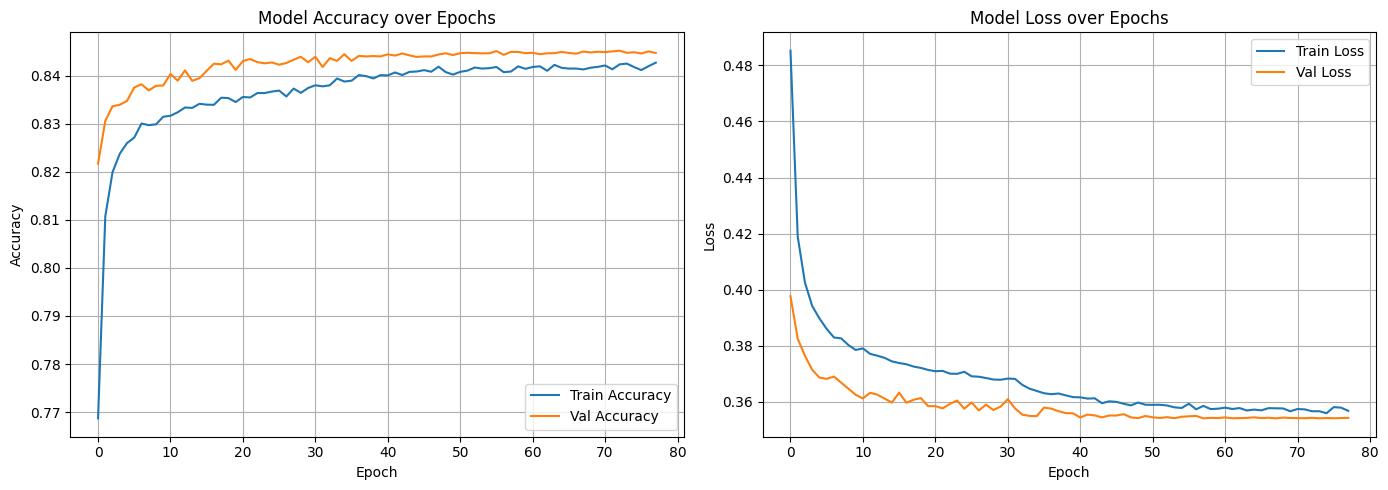

In [29]:

# Accuracy Plot
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [30]:
best_epoch = np.argmax(history.history['val_accuracy']) + 1
best_val_acc = np.max(history.history['val_accuracy'])

print(f"Best epoch: {best_epoch}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")


Best epoch: 73
Best Validation Accuracy: 0.8452


In [ ]:
loss1, acc1 = baseline_model.evaluate(X_test, y_test)
print(f"Test accuracy : {100*acc1:.2f}%")
print(f"Test loss     : {100*loss1:.2f}%")

**Hyperparameter Search**

**MODEL EVALUATION METRICS**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = np.argmax(tuned_model.predict(X_test), axis=1)

print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [31]:
# Predict probabilities
y_probs = model.predict(X_test).flatten()
y_preds = (y_probs > 0.5).astype(int)


869/869 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


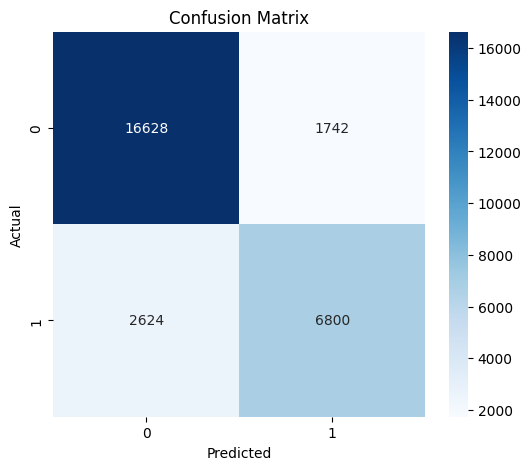

In [33]:
cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


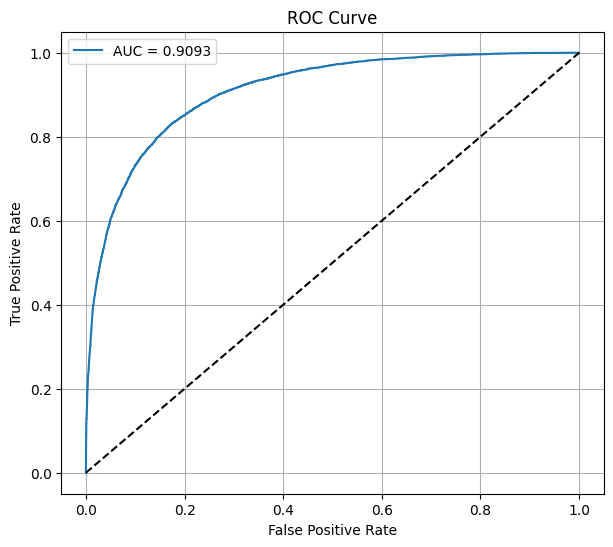

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
print("Accuracy:", round((y_preds == y_test).mean(), 4))
print("Precision:", round(precision_score(y_test, y_preds), 4))
print("Recall:", round(recall_score(y_test, y_preds), 4))
print("F1 Score:", round(f1_score(y_test, y_preds), 4))
print("ROC-AUC:", round(roc_auc, 4))


Accuracy: 0.8429
Precision: 0.7961
Recall: 0.7216
F1 Score: 0.757
ROC-AUC: 0.9093


In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1)
xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)
xgb_probs = xgb.predict_proba(X_test)[:, 1]

print("XGBoost Accuracy:", round((xgb_preds == y_test).mean(), 4))
print("XGBoost ROC-AUC:", round(roc_auc_score(y_test, xgb_probs), 4))


XGBoost Accuracy: 0.8393
XGBoost ROC-AUC: 0.9069


**4. Reflection**

### Q1: How did model depth and activation affect performance?
Deeper models with ReLU activation improved learning capacity but risked overfitting. Adding dropout and batch normalization helped stabilize performance.

### Q2: What helped mitigate overfitting?
Dropout layers (0.3–0.5), BatchNormalization, EarlyStopping, and ReduceLROnPlateau were effective. Smaller learning rates and fewer epochs helped too.

### Q3: How did the learning rate and optimizer affect convergence?
Adam converged faster and more smoothly than SGD. ReduceLROnPlateau adjusted the learning rate during plateaus, helping prevent stuck optimization.

### Q4: What would you improve with more time or compute?
- Hyperparameter tuning (using KerasTuner or Optuna)
- Cross-validation for more robust evaluation
- Try ensembling DL + XGBoost
- Use feature importance (SHAP/TreeExplainer)
